In [32]:
#Imports
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [2]:
# Import data
train = 'https://raw.githubusercontent.com/ss16318/AML_Group_3/main/train.csv'
df_train_raw = pd.read_csv(train)

test_x = 'https://raw.githubusercontent.com/ss16318/AML_Group_3/main/test.csv'
df_test_x_raw = pd.read_csv(test_x)

test_y = 'https://raw.githubusercontent.com/ss16318/AML_Group_3/main/sample_submission.csv'
df_test_y_raw= pd.read_csv(test_y)

In [3]:
# Cleaning and sampling data -- Penny

# check percentage of missing data for each feature in train dataset
na_col_train = [i for i in df_train_raw.columns if df_train_raw[i].isnull().sum() > 0]
print((df_train_raw[na_col_train].isna().sum()/len(df_train_raw.Id)).sort_values())
na_col_train = list((df_train_raw[na_col_train].isna().sum()/len(df_train_raw.Id)).sort_values().index)

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64


In [4]:
# check whether missed variables are categorical or numerical
cat_na_col = df_train_raw[na_col_train].select_dtypes('object').columns
cat_na_col

Index(['Electrical', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'BsmtExposure', 'BsmtFinType2', 'GarageCond', 'GarageQual',
       'GarageFinish', 'GarageType', 'FireplaceQu', 'Fence', 'Alley',
       'MiscFeature', 'PoolQC'],
      dtype='object')

In [5]:
num_na_col = df_train_raw[na_col_train].select_dtypes('number').columns
num_na_col

Index(['MasVnrArea', 'GarageYrBlt', 'LotFrontage'], dtype='object')

In [6]:
# may consider to drop features that contain large percent missing values
df_train = df_train_raw.drop(columns=na_col_train[-5:])
# drop missing values with small percentage
df_train = df_train.dropna(subset=na_col_train[:-6], how='any')
# take mean of missed LotFrontage
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())

In [7]:
# check percentage of missing data for each feature in test dataset
na_col_test = [i for i in df_test_x_raw.columns if df_test_x_raw[i].isnull().sum() > 0]
print((df_test_x_raw[na_col_test].isna().sum()/len(df_test_x_raw.Id)).sort_values())
na_col_test = list((df_test_x_raw[na_col_test].isna().sum()/len(df_test_x_raw.Id)).sort_values().index)

TotalBsmtSF     0.000685
GarageArea      0.000685
GarageCars      0.000685
KitchenQual     0.000685
BsmtUnfSF       0.000685
BsmtFinSF2      0.000685
BsmtFinSF1      0.000685
SaleType        0.000685
Exterior1st     0.000685
Exterior2nd     0.000685
Functional      0.001371
Utilities       0.001371
BsmtHalfBath    0.001371
BsmtFullBath    0.001371
MSZoning        0.002742
MasVnrArea      0.010281
MasVnrType      0.010966
BsmtFinType2    0.028787
BsmtFinType1    0.028787
BsmtQual        0.030158
BsmtExposure    0.030158
BsmtCond        0.030843
GarageType      0.052090
GarageFinish    0.053461
GarageQual      0.053461
GarageCond      0.053461
GarageYrBlt     0.053461
LotFrontage     0.155586
FireplaceQu     0.500343
Fence           0.801234
Alley           0.926662
MiscFeature     0.965045
PoolQC          0.997944
dtype: float64


In [8]:
# split train dataset
df_train_x = df_train.drop(columns='SalePrice')
df_train_y = df_train['SalePrice']

df_train_x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,112,0,0,0,0,4,2010,WD,Normal


In [9]:
## Seb Encoding, Correlation and Clustering

#List categorical features
categorical_feats = df_train_x.select_dtypes('object').columns
categorical_feats

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [20]:
# Encode variables

# Target Encode features that have many groups / are not ordinal
target_cat_feats = ['GarageType', 'Functional', 'Electrical', 'SaleCondition', 'SaleType', 'Heating', 'BsmtFinType2', 'BsmtFinType1', 'Foundation', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType']
target_encoder = ce.TargetEncoder(cols=target_cat_feats)

target_encoder.fit(df_train_x, df_train_y)
df_train_x_te = target_encoder.transform(df_train_x)

# Ordinal Encode features with few groups / have a natural order
ordinal_cat_feats = ['KitchenQual', 'PavedDrive', 'GarageCond', 'GarageQual', 'GarageFinish', 'CentralAir', 'HeatingQC', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond']
ordinal_encoder = ce.OrdinalEncoder(cols=ordinal_cat_feats)

ordinal_encoder.fit(df_train_x_te, df_train_y)
df_train_x_encoded = ordinal_encoder.transform(df_train_x_te)

C:\Users\sebas\anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\sebas\anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [21]:
df_train_x_encoded

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,196479.941839,65.0,8450,1,1,1,1,182830.166144,...,61,0,0,0,0,0,2,2008,179151.33506,180521.265399
1,2,20,196479.941839,80.0,9600,1,1,1,1,184398.255814,...,0,0,0,0,0,0,5,2007,179151.33506,180521.265399
2,3,60,196479.941839,68.0,11250,1,2,1,1,182830.166144,...,42,0,0,0,0,0,9,2008,179151.33506,180521.265399
3,4,70,196479.941839,60.0,9550,1,2,1,1,187152.299180,...,35,272,0,0,0,0,2,2006,179151.33506,154605.686047
4,5,60,196479.941839,84.0,14260,1,2,1,1,184398.255814,...,84,0,0,0,0,0,12,2008,179151.33506,180521.265399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,196479.941839,62.0,7917,1,1,1,1,182830.166144,...,40,0,0,0,0,0,8,2007,179151.33506,180521.265399
1456,1457,20,196479.941839,85.0,13175,1,1,1,1,182830.166144,...,0,0,0,0,0,0,2,2010,179151.33506,180521.265399
1457,1458,70,196479.941839,66.0,9042,1,1,1,1,182830.166144,...,60,0,0,0,0,2500,5,2010,179151.33506,180521.265399
1458,1459,20,196479.941839,68.0,9717,1,1,1,1,182830.166144,...,0,112,0,0,0,0,4,2010,179151.33506,180521.265399


In [22]:
df_train_x_encoded.select_dtypes('object').columns

Index([], dtype='object')

In [23]:
#Drop ID column
df_train_x_encoded = df_train_x_encoded.drop('Id', axis=1)

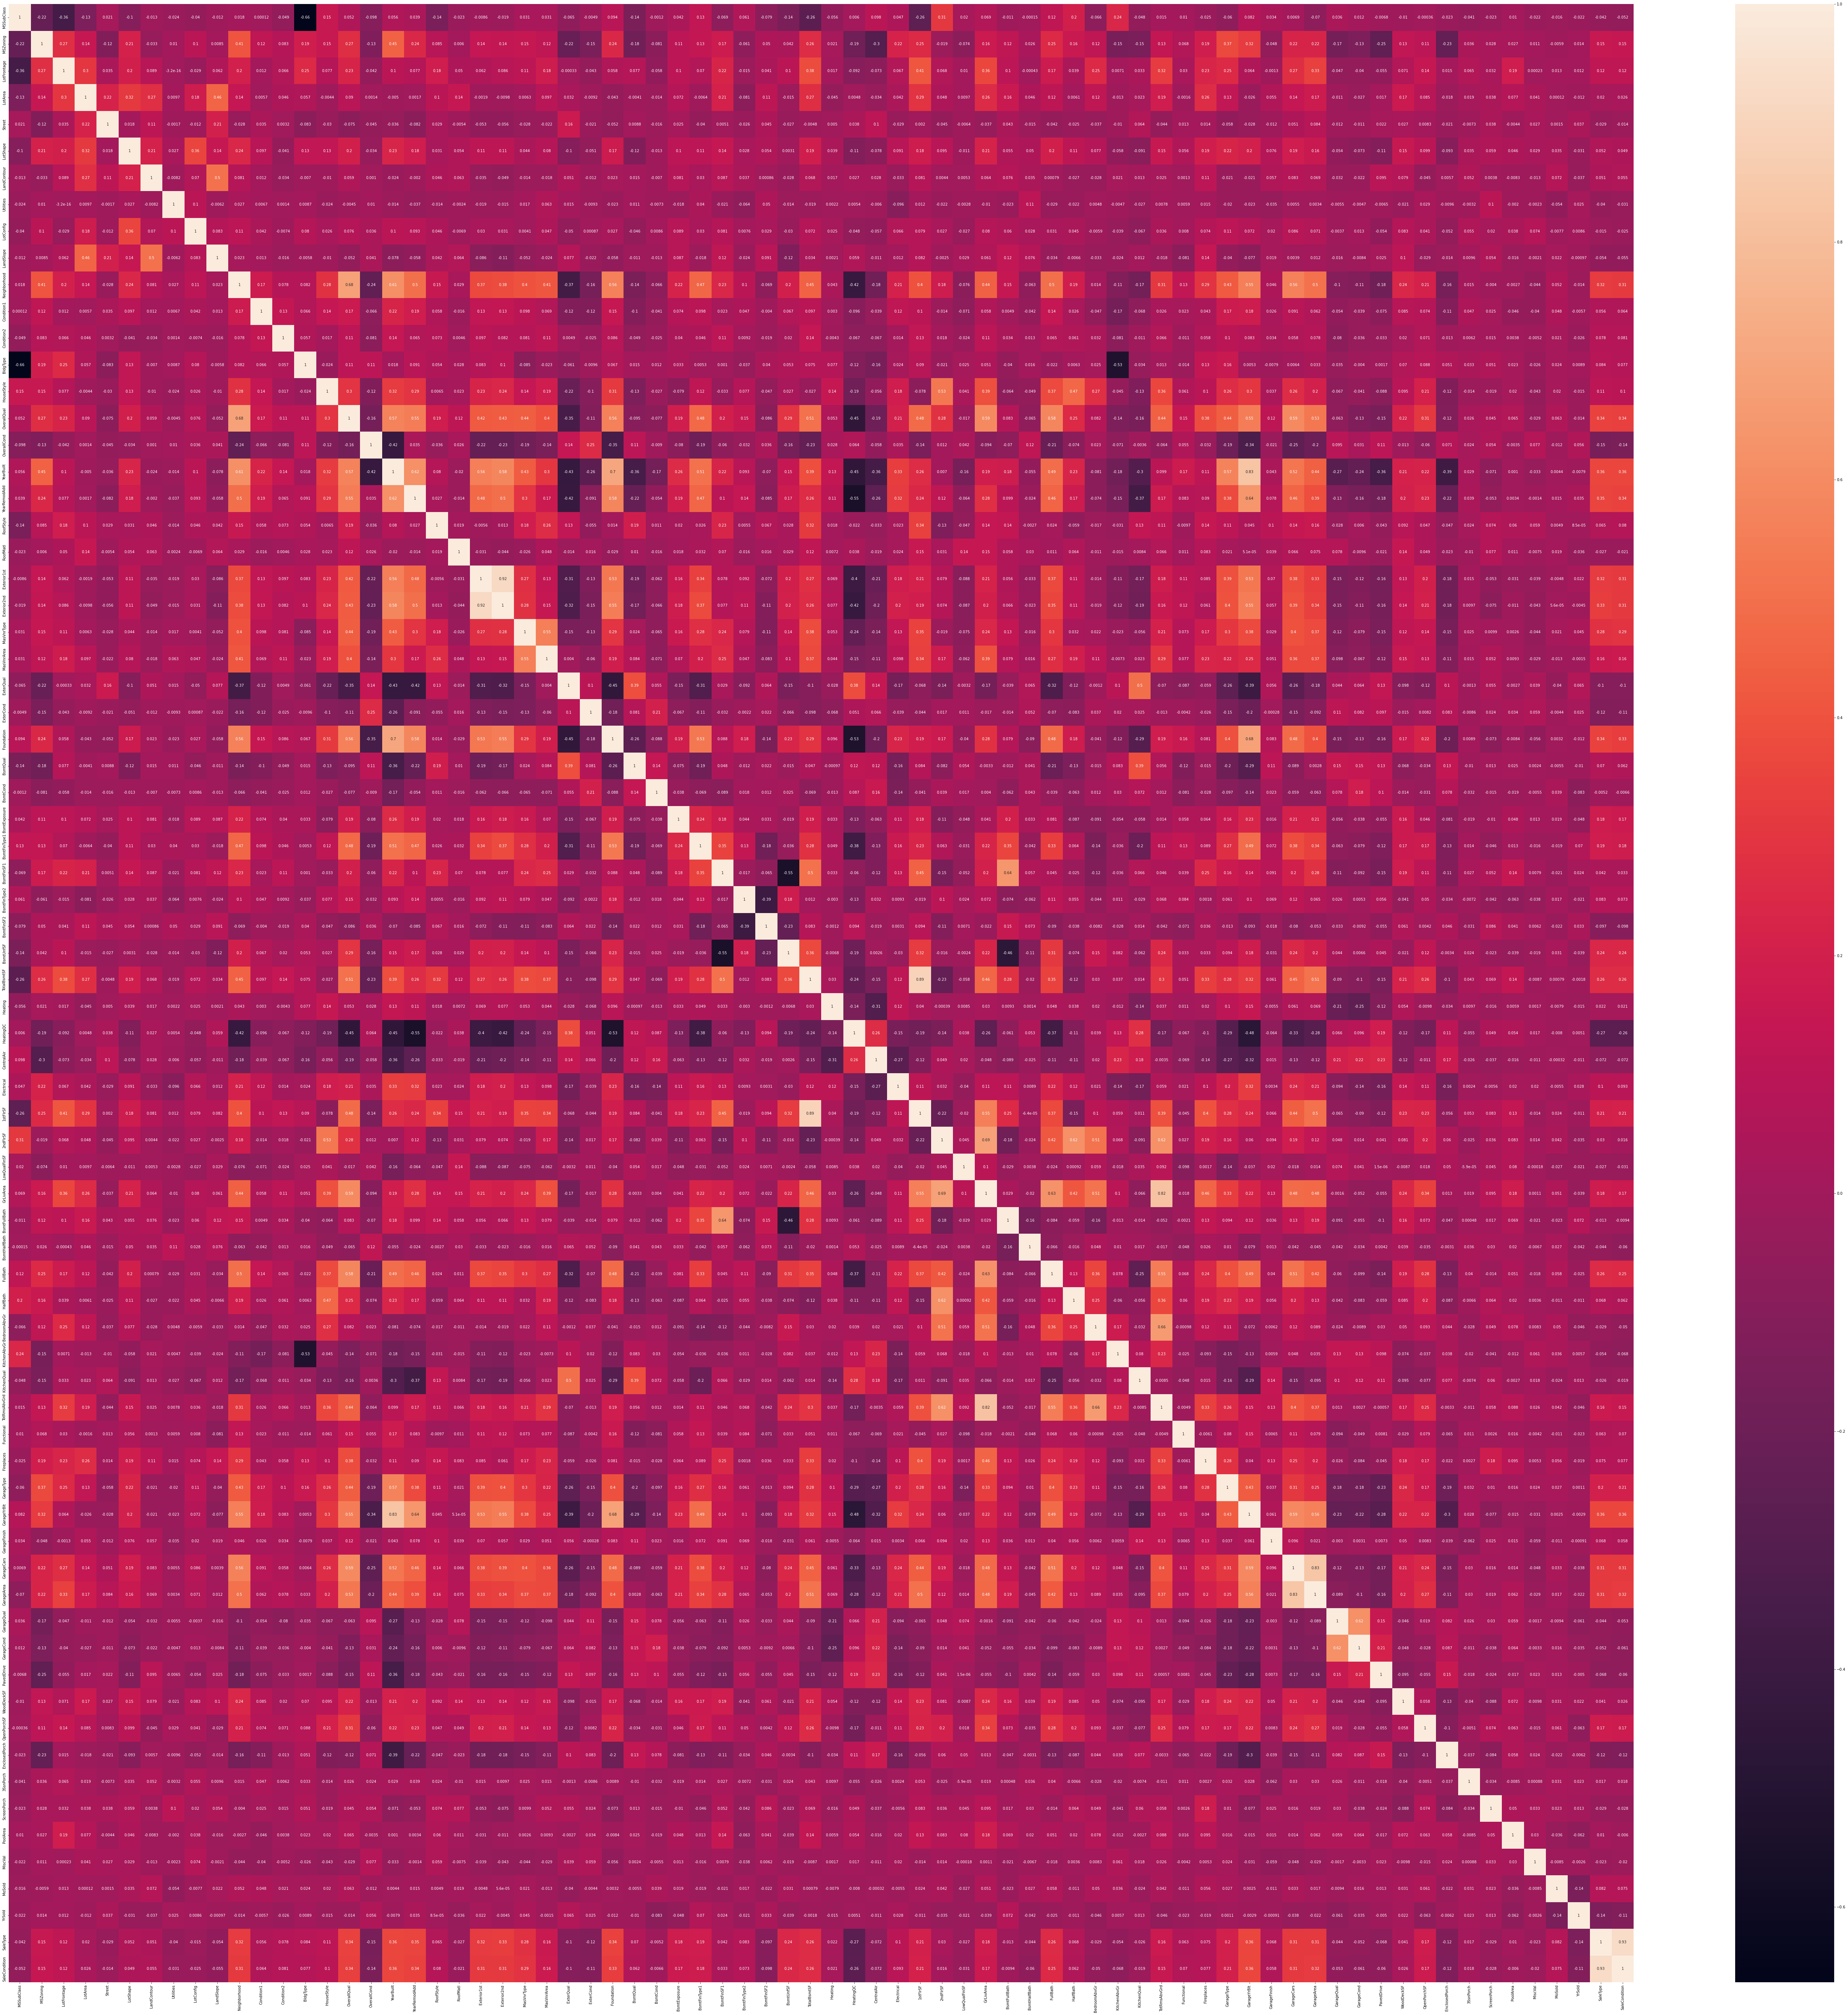

['Exterior2nd', 'SaleCondition']

In [29]:
# We will probably to PCA, so looking at correlations is probably not too important

#plot correlation matrix
plt.figure(figsize=(100,100))
corr_matrix = df_train_x_encoded.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Take absolute values of correlations and select upper triangle of correlation matrix
upper_matrix = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
correlated_features = [column for column in upper_matrix.columns if any(upper_matrix[column] > 0.9)]
correlated_features

In [31]:
#Scale Data
scale = StandardScaler()
df_train_x_scaled = scale.fit_transform(df_train_x_encoded)

C:\Users\sebas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


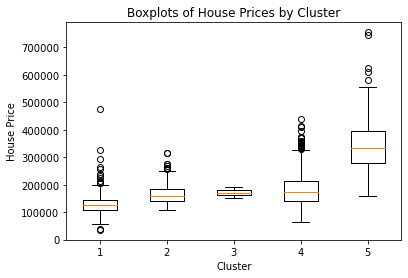

Cluster 1: 209 data points
Cluster 2: 112 data points
Cluster 3: 2 data points
Cluster 4: 918 data points
Cluster 5: 97 data points


In [75]:
#Gaussian Mixture Modelling
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(df_train_x_scaled)

# Predict the labels for the data
labels = gmm.predict(df_train_x_scaled)

# Create a list of y values for each cluster
y_cluster = [df_train_y[labels == i] for i in range(gmm.n_components)]

# Sort clusters in ascending order (by median)
sorted_y_cluster = sorted(y_cluster, key=lambda x: np.median(x))

# Boxplot of clusters
plt.boxplot(sorted_y_cluster)
plt.title("Boxplots of House Prices by Cluster")
plt.xlabel("Cluster")
plt.ylabel("House Price")
plt.show()

# Count number of points in each cluster
for i in range(0,len(sorted_y_cluster)):
    print("Cluster " + str(i+1) + ": " + str(len(sorted_y_cluster[i])) + " data points")  